<div align="center">
<h1>In The Name Of GOD</h1>
</div>

# HW1 - Data Mining - Notebook 2

## 1. Regression

### Importing Libraries

In [26]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Reading Data from the `GOOGL.csv` file

In [27]:
# Read the data
df = pd.read_csv('GOOGL.csv', sep=',', usecols=['Open'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3019 entries, 0 to 3018
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3019 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [28]:
df.head(10)

,Open
0,211.47
1,222.17
2,223.22
3,228.66
4,233.44
5,232.44
6,235.87
7,237.10
8,232.39
9,231.76


### Creating a linear regression model and fitting it to the training data and predicting the test data

#### Constant Term

In [29]:
NUM_TEST = 10

#### defining required functions

In [30]:
def find_less_min_square(A, B):
    return np.linalg.solve(np.matmul(A.T, A), np.matmul(A.T, B))

def calc_error(A, X, expected_y):
	return np.matmul(A, X) - expected_y

def calc_error_norm(A, X, expected_y):
	return np.linalg.norm(np.matmul(A, X) - expected_y)

def get_matrix(data):
    matrix = np.zeros((data.size, 2))
    for i in range(data.size):
        matrix[i,0] = i;
        matrix[i,1] = data.iloc[i,0];
    return matrix

def print_single_result(A, X, err, expected_y):
	print(f'Test Day {int(A[1])}')
	print(f'Calculated Value: {X[0]}')
	print(f'Actual Value: {expected_y[0]}')
	print(f'error: {err[0]}')
	print("---------------------------------------")

def plot_result(X, Y, size):
	days = [i for i in range(size)]
	plt.figure()
	plt.figure(figsize=(20,10))
	plt.plot(days, Y, 'ro', label='Actual Value', markersize=3, linewidth=0.1, linestyle='solid', alpha=0.8)
	plt.plot(days, X, 'dodgerblue', label='Calculated Value', markersize=6, linewidth=2.5, linestyle='solid')
	plt.legend()
	plt.show()

def show_result(A, X, Y, err, size):
	for i in range (NUM_TEST):
		print_single_result(A[i]+1,X[i],err[i],Y[i])
	print("---------------------------------------")
	plot_result(X, Y, size)

### Creating Matrices from the data

In [31]:
matrix = get_matrix(df)
y_matrix = matrix[:df.size,1].reshape(-1,1)

### Calculating the Linear Solution

First we divide the data into training and test data. Then we create a linear regression model and fit it to the training data. After that we predict the test data and calculate the mean squared error.

In [32]:
linear_x_matrix = np.hstack((np.ones((df.size, 1)), matrix[:df.size, 0].reshape(-1, 1)))

train_x_matrix_linear = linear_x_matrix[:df.size-NUM_TEST,:]
train_y_matrix_linear = y_matrix[:df.size-NUM_TEST,:]
test_x_matrix_linear = linear_x_matrix[df.size-NUM_TEST:,:]
test_y_matrix_linear = y_matrix[df.size-NUM_TEST:,:]

In [33]:
linear_solution = find_less_min_square(train_x_matrix_linear, train_y_matrix_linear)
linear_estimated_values = np.matmul(linear_x_matrix, linear_solution)

linear_err = calc_error(test_x_matrix_linear, linear_solution, test_y_matrix_linear)
norm_linear_err = calc_error_norm(test_x_matrix_linear, linear_solution, test_y_matrix_linear)

### Showing the results of the linear model

Test Day 1
Calculated Value: 61.75936093602065
Actual Value: 211.47
error: -273.1630839153654
---------------------------------------
Test Day 2
Calculated Value: 62.00158677688094
Actual Value: 222.17
error: -285.59085807450515
---------------------------------------
Test Day 3
Calculated Value: 62.24381261774123
Actual Value: 223.22
error: -291.91863223364476
---------------------------------------
Test Day 4
Calculated Value: 62.48603845860152
Actual Value: 228.66
error: -289.57640639278463
---------------------------------------
Test Day 5
Calculated Value: 62.72826429946181
Actual Value: 233.44
error: -283.80418055192433
---------------------------------------
Test Day 6
Calculated Value: 62.9704901403221
Actual Value: 232.44
error: -278.1719547110639
---------------------------------------
Test Day 7
Calculated Value: 63.21271598118239
Actual Value: 235.87
error: -276.5697288702038
---------------------------------------
Test Day 8
Calculated Value: 63.454941822042684
Actual Valu

<Figure size 432x288 with 0 Axes>

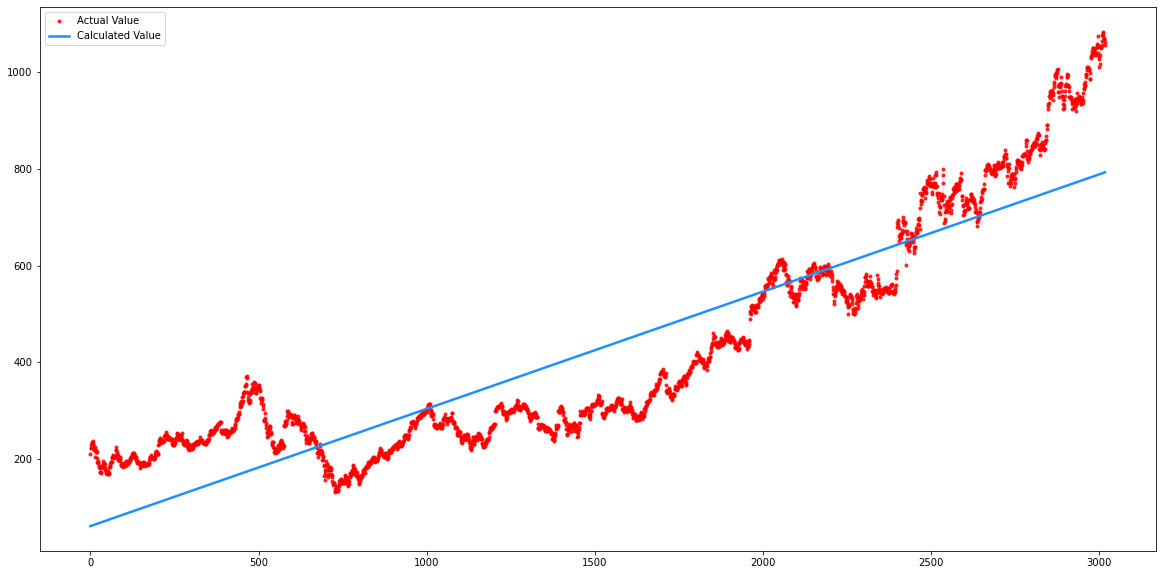

In [34]:
show_result(linear_x_matrix, linear_estimated_values, y_matrix, linear_err, df.size)

### Calculating the Polynomial Solution

First we divide the data into training and test data. Then we create a linear regression model and fit it to the training data. After that we predict the test data and calculate the mean squared error.

In [35]:
polynomial_x_matrix = np.hstack((np.ones((df.size, 1)), matrix[:df.size, 0].reshape(-1, 1),matrix[:df.size, 0].reshape(-1, 1)**2))

train_x_matrix_polynomial = polynomial_x_matrix[:df.size-NUM_TEST,:]
train_y_matrix_polynomial = y_matrix[:df.size-NUM_TEST,:]
test_x_matrix_polynomial = polynomial_x_matrix[df.size-NUM_TEST:,:]
test_y_matrix_polynomial = y_matrix[df.size-NUM_TEST:,:]

In [36]:
polynomial_solution = find_less_min_square(train_x_matrix_polynomial, train_y_matrix_polynomial)
polynomial_estimated_values = np.matmul(polynomial_x_matrix, polynomial_solution)

polynomial_err = calc_error(test_x_matrix_polynomial, polynomial_solution, test_y_matrix_polynomial)
norm_polynomial_err = calc_error_norm(test_x_matrix_polynomial, polynomial_solution, test_y_matrix_polynomial)

### Showing the results of the polynomial solution

Test Day 1
Calculated Value: 264.6055804899682
Actual Value: 211.47
error: -69.91198177718354
---------------------------------------
Test Day 2
Calculated Value: 264.4431928609735
Actual Value: 222.17
error: -81.93460423770898
---------------------------------------
Test Day 3
Calculated Value: 264.28107434635854
Actual Value: 223.22
error: -87.85695758385464
---------------------------------------
Test Day 4
Calculated Value: 264.11922494612327
Actual Value: 228.66
error: -85.1090418156208
---------------------------------------
Test Day 5
Calculated Value: 263.95764466026765
Actual Value: 233.44
error: -78.93085693300714
---------------------------------------
Test Day 6
Calculated Value: 263.79633348879173
Actual Value: 232.44
error: -72.8924029360137
---------------------------------------
Test Day 7
Calculated Value: 263.63529143169546
Actual Value: 235.87
error: -70.88367982464081
---------------------------------------
Test Day 8
Calculated Value: 263.4745184889789
Actual Value

<Figure size 432x288 with 0 Axes>

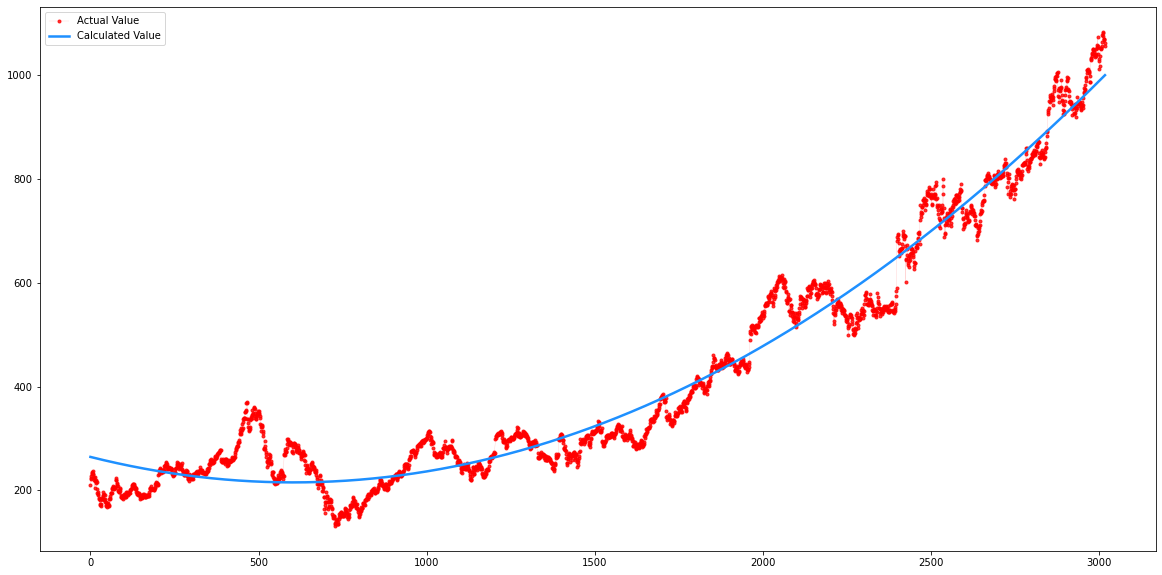

In [37]:
show_result(polynomial_x_matrix, polynomial_estimated_values, y_matrix, polynomial_err, df.size)

In [38]:
print(f'Norm of Linear model error: {norm_linear_err}')
print(f'Total linear error: {np.sum(np.abs(linear_err))}')
print('---------------------------------------')
print(f'Norm of Polynomial model error: {norm_polynomial_err}')
print(f'Total polynomial error: {np.sum(np.abs(polynomial_err))}')

Norm of Linear model error: 881.2736645959852
Total linear error: 2785.470676314941
---------------------------------------
Norm of Polynomial model error: 234.2807732126826
Total polynomial error: 734.6955347699165


<Figure size 432x288 with 0 Axes>

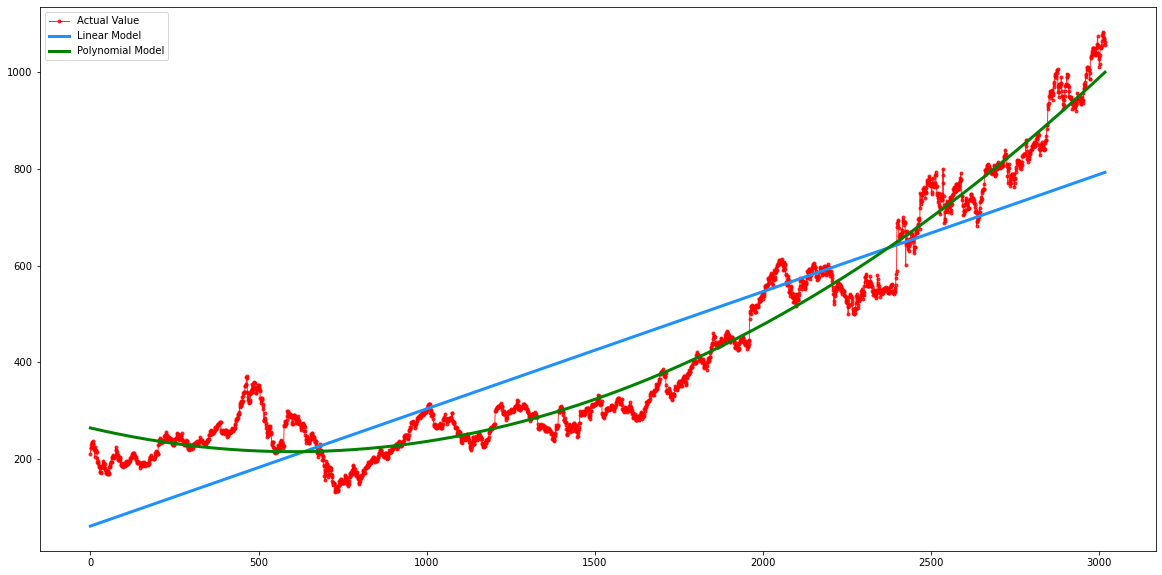

In [40]:
days = [i for i in range(df.size)]
plt.figure()
plt.figure(figsize=(20,10))
plt.plot(days, y_matrix, 'ro', label='Actual Value', markersize=3, linewidth=1, linestyle='solid', alpha=0.8)
plt.plot(days, linear_estimated_values, 'dodgerblue', label='Linear Model', markersize=6, linewidth=3, linestyle='solid')
plt.plot(days, polynomial_estimated_values, 'green', label='Polynomial Model', markersize=6, linewidth=3, linestyle='solid')
plt.legend()
plt.show()

### from the results we can see that the polynomial solution is better than the linear solution in terms of the error.

# Thanks for your attention :)